Decision Tree:
---------------------


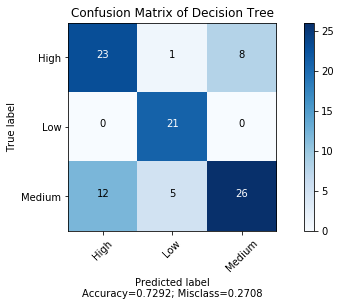



Classification Report:
-----------------------
              precision    recall  f1-score   support

          0       0.66      0.72      0.69        32
          1       0.78      1.00      0.88        21
          2       0.76      0.60      0.68        43

avg / total       0.73      0.73      0.72        96

-------------------------------



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
from sklearn import linear_model
from sklearn import naive_bayes,neural_network
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori
import itertools


tn = list(['High', 'Low', 'Medium'])

def plot_confusion_matrix(cm,target_names,title):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names,rotation=45)
        plt.yticks(tick_marks, target_names)


    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\nAccuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


def p_result(y_test,y_pred,title='Confusion Matrix'):

    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm,tn,title)

    print('\n\nClassification Report:\n-----------------------\n', classification_report(y_test, y_pred))
    print('-------------------------------\n')



def decition_tree(x_train,x_test,y_train,y_test,rd):

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    p_result(y_test,y_pred,'Confusion Matrix of Decision Tree')
    # graph dot file output
    hd = list(rd)
    tree.export_graphviz(clf, out_file='tree.dot',feature_names= hd[:-1],  class_names= hd[-1])



def naive_bs(x_train,x_test,y_train,y_test):

    nb = naive_bayes.GaussianNB()
    nb.fit(x_train,y_train)
    pred = nb.predict(x_test)
    p_result(y_test,pred,'Confusion Matrix of Naive Bayes')


def neural_net(x_train,x_test,y_train,y_test):

    scale = StandardScaler()
    scale.fit(x_train)
    x_train = scale.transform(x_train)
    x_test = scale.transform(x_test)

    ann = neural_network.MLPClassifier(hidden_layer_sizes=(18),max_iter=1000,activation='logistic')

    ann.fit(x_train,y_train)
    pred = ann.predict(x_test)
    p_result(y_test,pred,'Confusion Matrix of Neural Network')





kd = pd.read_csv('edu.csv', delimiter=',')

le = preprocessing.LabelEncoder()
rd = kd.apply(le.fit_transform)

x = rd.drop('Class', axis=1)
y = rd['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1)

print("Decision Tree:")
print("---------------------")
decition_tree(x_train,x_test,y_train,y_test,rd)





Naive Bayes: 

---------------------


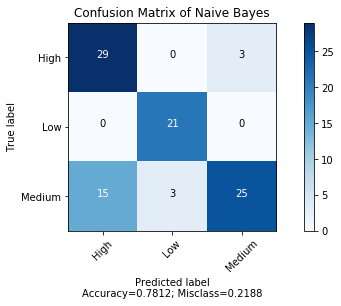



Classification Report:
-----------------------
              precision    recall  f1-score   support

          0       0.66      0.91      0.76        32
          1       0.88      1.00      0.93        21
          2       0.89      0.58      0.70        43

avg / total       0.81      0.78      0.77        96

-------------------------------



In [21]:
print("Naive Bayes: \n")
print("---------------------")
naive_bs(x_train,x_test,y_train,y_test)


Neural Network: 

---------------------


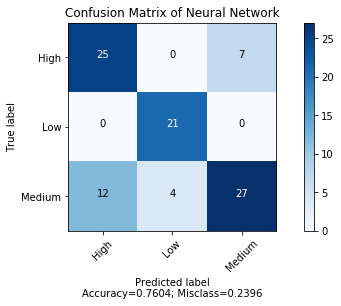



Classification Report:
-----------------------
              precision    recall  f1-score   support

          0       0.68      0.78      0.72        32
          1       0.84      1.00      0.91        21
          2       0.79      0.63      0.70        43

avg / total       0.76      0.76      0.76        96

-------------------------------



In [22]:
print("Neural Network: \n")
print("---------------------")
neural_net(x_train,x_test,y_train,y_test)

c:\program files\python35-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


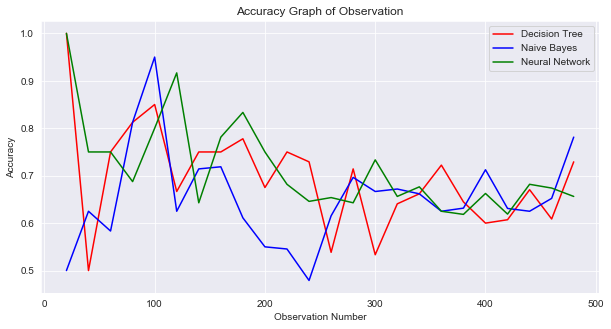

In [97]:

def observation():
    kd = pd.read_csv('edu.csv', delimiter=',')

    le = preprocessing.LabelEncoder()
    rd = kd.apply(le.fit_transform)

    dc = DecisionTreeClassifier()
    nb = naive_bayes.GaussianNB()
    ann = neural_network.MLPClassifier(hidden_layer_sizes=(18), max_iter=1000, activation='logistic')


    XX,yy1,yy2,yy3= [],[],[],[]

    for tot in range(20,len(kd)+1,20):
        x = rd.drop('Class', axis=1)[:tot]
        y = rd['Class'][:tot]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1)
        dc.fit(x,y)
        nb.fit(x,y)
        ann.fit(x,y)

        dc.fit(x_train, y_train)
        pred_1 = dc.predict(x_test)

        nb.fit(x_train, y_train)
        pred_2 = nb.predict(x_test)

        ann.fit(x_train, y_train)
        pred_3 = ann.predict(x_test)

        XX.append(tot)
        yy1.append(accuracy_score(y_test,pred_1))
        yy2.append(accuracy_score(y_test,pred_2))
        yy3.append(accuracy_score(y_test,pred_3))
        
    
    plt.figure(figsize=(10,5))
    plt.plot(XX,yy1,color='R',label='Decision Tree')
    plt.plot(XX,yy2,color='b',label='Naive Bayes')
    plt.plot(XX,yy3,color='g',label='Neural Network')
    plt.title("Accuracy Graph of Observation")
    plt.xlabel("Observation Number")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()




observation()


